<h1 align="center"> Vehicle Insurance: EDA and Classify </h1>

<img src="https://images.financialexpress.com/2019/08/health-insurance.jpg" width="50%" />

Created: 2020-09-16

Last updated: 2020-09-16

Kaggle Kernel made by 🚀 <a href="https://www.kaggle.com/rafanthx13"> Rafael Morais de Assis</a>

## Problem Description

### Goal

**Classification:** Building a model to predict whether a customer would be interested in Vehicle Insurance

Metrics: ROC_AUC


### DataSet Links

+ Kaggle: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
+ Kaggle: https://www.kaggle.com/jassican/janatahack-crosssell-prediction 
+ Analytic Vidhya Hackaton: https://datahack.analyticsvidhya.com/contest/janatahack-cross-sell-prediction/

### DataSet Description

| Variable           | Definition                                                                                                                      | Values                                               |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|
| id                 | Unique ID for the customer                                                                                                      | int                                                  |
| Gender             | Gender of the customer                                                                                                          | string :: ['Male','Female']                          |
| Age                | Age of the customer                                                                                                             | int :: [20, 85]                                      |
| Driving_License    | 0 : Customer does not have DL;<br>1 : Customer already has DL                                                                   | int(categorical) :: [0,1]                            |
| Region_Code        | Unique code for the region of the customer                                                                                      | float(categorical) :: [0,52]                         |
| Previously_Insured | 1 : Customer already has Vehicle Insurance;<br>0 : Customer doesn't have Vehicle Insurance                                      | int(categorical) :: [0,1]                            |
| Vehicle_Age        | Age of the Vehicle                                                                                                              | string :: [ '1-2 Year'; <br>'< 1 Year'; '> 2 Years'] |
| Vehicle_Damage     | 1 : Customer got his/her vehicle damaged in the past;<br>0 : Customer didn't get his/her vehicle damaged in the past.           | int(categorical) :: [0,1]                            |
| Annual_Premium     | The amount customer needs to pay as premium in the year                                                                         | float :: [2,630 ; 513,00 ]                           |
| PolicySalesChannel | Anonymized Code for the channel of outreaching to the customer ie.<br> Different Agents, Over Mail, Over Phone, In Person, etc. | float(categorical) :: [1.0, 163.0]                   |
| Vintage            | Number of Days, Customer has been associated with the company                                                                   | float :: [10.0, 299.0]                               |
| Response           | 1 : Customer is interested;<br>0 : Customer is not interested                                                                   | int(categorical) :: [0,1]                            |

## Table Of Contents (TOC) <a id="top"></a>

+ [Import Libs and DataSet](#index01)
+ [Snippets](#index02)
+ [Data Cleaning](#index03)
+ [EDA](#index04)
  - [Each feature individually](#index05)
  - [Feature by Target: Response](#index06)
+ [Corr](#index07)
  - [Corr to PolicySalesChannel as Categorical Feature](#index08)
  - [Corr to RegionCode as Categorical Feature](#index09)
  - [All Corr](#index10)
+ [Pre-Processing](#index11)
+ [Split Train and Test](#index12)
+ [Handle Unbalanced DataSet](#index13)
+ [Develop Model](#index14)
  - [CV, Fitting and Testing](#index15)
  - [CatBoost](#index16)
  - [Super Leaner](#index17)
+ [Submission](#index18)
+ [Conclusion](#index19)

## Import Libs and DataSet <a id='index01'></a>

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eli5 # lib to debug ML Models

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Configs
pd.options.display.float_format = '{:,.4f}'.format
sns.set(style="whitegrid")
plt.style.use('seaborn')
seed = 42
np.random.seed(seed)

/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv
/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv


In [337]:
file_path = '/kaggle/input/health-insurance-cross-sell-prediction/train.csv'
df = pd.read_csv(file_path)
print("DataSet = {:,d} rows and {} columns".format(df.shape[0], df.shape[1]))

print("\nAll Columns:\n=>", df.columns.tolist())

quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

print("\nStrings Columns:\n=>", qualitative,
      "\n\nNumerics Columns:\n=>", quantitative)

df.head()

DataSet = 381,109 rows and 12 columns

All Columns:
=> ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

Strings Columns:
=> ['Gender', 'Vehicle_Age', 'Vehicle_Damage'] 

Numerics Columns:
=> ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0000,0,> 2 Years,Yes,"40,454.0000",26.0000,217,1
1,2,Male,76,1,3.0000,0,1-2 Year,No,"33,536.0000",26.0000,183,0
2,3,Male,47,1,28.0000,0,> 2 Years,Yes,"38,294.0000",26.0000,27,1
3,4,Male,21,1,11.0000,1,< 1 Year,No,"28,619.0000",152.0000,203,0
4,5,Female,29,1,41.0000,1,< 1 Year,No,"27,496.0000",152.0000,39,0


In [338]:
file_path = '/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv'
df_sample_submission = pd.read_csv(file_path)
print("DataSet = {:,d} rows and {} columns".format(df_sample_submission.shape[0], df_sample_submission.shape[1]))
df_sample_submission.head(2)

DataSet = 127,037 rows and 2 columns


,id,Response
0,381110,0
1,381111,0


In [339]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"381,109.0000","190,555.0000","110,016.8362",1.0000,"95,278.0000","190,555.0000","285,832.0000","381,109.0000"
Age,"381,109.0000",38.8226,15.5116,20.0000,25.0000,36.0000,49.0000,85.0000
Driving_License,"381,109.0000",0.9979,0.0461,0.0000,1.0000,1.0000,1.0000,1.0000
Region_Code,"381,109.0000",26.3888,13.2299,0.0000,15.0000,28.0000,35.0000,52.0000
Previously_Insured,"381,109.0000",0.4582,0.4983,0.0000,0.0000,0.0000,1.0000,1.0000
Annual_Premium,"381,109.0000","30,564.3896","17,213.1551","2,630.0000","24,405.0000","31,669.0000","39,400.0000","540,165.0000"
Policy_Sales_Channel,"381,109.0000",112.0343,54.2040,1.0000,29.0000,133.0000,152.0000,163.0000
Vintage,"381,109.0000",154.3474,83.6713,10.0000,82.0000,154.0000,227.0000,299.0000
Response,"381,109.0000",0.1226,0.3279,0.0000,0.0000,0.0000,0.0000,1.0000


## Snippets <a id='index02'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [340]:
# statistics
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax #for some statistics
from scipy.special import boxcox1p

def test_normal_distribution(serie, series_name='series', thershold=0.4):
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=False)
    f.suptitle('{} is a Normal Distribution?'.format(series_name), fontsize=18)
    ax1.set_title("Histogram to " + series_name)
    ax2.set_title("Q-Q-Plot to "+ series_name)
    
    # calculate normal distrib. to series
    mu, sigma = norm.fit(serie)
    print('Normal dist. (mu= {:,.2f} and sigma= {:,.2f} )'.format(mu, sigma))
    
    # skewness and kurtoise
    skewness = serie.skew()
    kurtoise = serie.kurt()
    print("Skewness: {:,.2f} | Kurtosis: {:,.2f}".format(skewness, kurtoise))
    # evaluate skeness
    # If skewness is less than −1 or greater than +1, the distribution is highly skewed.
    # If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
    # If skewness is between −½ and +½, the distribution is approximately symmetric.
    pre_text = '\t=> '
    if(skewness < 0):
        text = pre_text + 'negatively skewed or left-skewed'
    else:
        text =  pre_text + 'positively skewed or right-skewed\n'
        text += pre_text + 'in case of positive skewness, log transformations usually works well.\n'
        text += pre_text + 'np.log(), np.log1(), boxcox1p()'
    if(skewness < -1 or skewness > 1):
        print("Evaluate skewness: highly skewed")
        print(text)
    if( (skewness <= -0.5 and skewness > -1) or (skewness >= 0.5 and skewness < 1)):
        print("Evaluate skewness: moderately skewed")
        print(text)
    if(skewness >= -0.5 and skewness <= 0.5):
        print('Evaluate skewness: approximately symmetric')
    # evaluate kurtoise
    #     Mesokurtic (Kurtoise next 3): This distribution has kurtosis statistic similar to that of the normal distribution.
    #         It means that the extreme values of the distribution are similar to that of a normal distribution characteristic. 
    #         This definition is used so that the standard normal distribution has a kurtosis of three.
    #     Leptokurtic (Kurtosis > 3): Distribution is longer, tails are fatter. 
    #         Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers.
    #         Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a 
    #         narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.
    #     Platykurtic: (Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution. The peak
    #         is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.
    #         The reason for this is because the extreme values are less than that of the normal distribution.
    print('evaluate kurtoise')
    if(kurtoise > 3 + thershold):
        print(pre_text + 'Leptokurtic: anormal: Peak is higher')
    elif(kurtoise < 3 - thershold):
        print(pre_text + 'Platykurtic: anormal: The peak is lower')
    else:
        print(pre_text + 'Mesokurtic: normal: the peack is normal')
    
    # shapiro-wilki test normality
    # If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
    # If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution
    #     print("Shapiro-Wiki Test: Is Normal Distribution? {}".format(stats.shapiro(serie)[1] < 0.01) )
    #     print(stats.shapiro(serie))

    
    # ax1 = histogram
    sns.distplot(serie , fit=norm, ax=ax1)
    ax1.legend(['Normal dist. ($\mu=$ {:,.2f} and $\sigma=$ {:,.2f} )'.format(mu, sigma)],
            loc='best')
    ax1.set_ylabel('Frequency')
    # ax2 = qq-plot
    stats.probplot(serie, plot=ax2)
    plt.show()

In [341]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

this_labels = ['Response 0','Response 1']
scoress = {}

def class_report(y_real, y_my_preds, name="", labels=this_labels):
    if(name != ''):
        print(name,"\n")
    print(confusion_matrix(y_real, y_my_preds), '\n')
    print(classification_report(y_real, y_my_preds, target_names=labels))
    scoress[name] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro')]
    
# Create DataFrame from Scores maded by 'class_report'
def create_df_fom_scores(scores=scoress):
    return pd.DataFrame(data= scoress.values(),
            columns=['acc','f1'],
            index=scoress.keys())

In [342]:
def check_balanced_train_test_binary(x_train, y_train, x_test, y_test, original_size, labels):
    """ To binary classification
    each paramethes is pandas.core.frame.DataFrame
    @total_size = len(X) before split
    @labels = labels in ordem [0,1 ...]
    """
    train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
    test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

    prop_train = train_counts_label/ len(y_train)
    prop_test = test_counts_label/ len(y_test)

    print("Original Size:", '{:,d}'.format(original_size))
    print("\nTrain: must be 80% of dataset:\n", 
          "the train dataset has {:,d} rows".format(len(x_train)),
          'this is ({:.2%}) of original dataset'.format(len(x_train)/original_size),
                "\n => Classe 0 ({}):".format(labels[0]), train_counts_label[0], '({:.2%})'.format(prop_train[0]), 
                "\n => Classe 1 ({}):".format(labels[1]), train_counts_label[1], '({:.2%})'.format(prop_train[1]),
          "\n\nTest: must be 20% of dataset:\n",
          "the test dataset has {:,d} rows".format(len(x_test)),
          'this is ({:.2%}) of original dataset'.format(len(x_test)/original_size),
                  "\n => Classe 0 ({}):".format(labels[0]), test_counts_label[0], '({:.2%})'.format(prop_test[0]),
                  "\n => Classe 1 ({}):".format(labels[1]),test_counts_label[1], '({:.2%})'.format(prop_test[1])
         )

In [343]:
def eda_categ_feat_desc_plot(series_categorical, title = "", fix_labels=False):
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    
    fig, ax = plt.subplots(figsize = (12,4), ncols=2, nrows=1) # figsize = (width, height)
    if(title != ""):
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.8)

    s = sns.barplot(x=series_name, y='quantity', data=val_concat, ax=ax[0])
    if(fix_labels):
        val_concat = val_concat.sort_values(series_name).reset_index()
    
    for index, row in val_concat.iterrows():
        s.text(row.name, row['quantity'], '{:,d}'.format(int(row['quantity'])), color='black', ha="center")

    s2 = val_concat.plot.pie(y='percentage', autopct=lambda value: '{:.2f}%'.format(value),
                             labels=val_concat[series_name].tolist(), legend=None, ax=ax[1],
                             title="Percentage Plot")

    ax[1].set_ylabel('')
    ax[0].set_title('Quantity Plot')

    plt.show()

In [344]:
def plot_top_bottom_rank_correlation(my_df, column_target, top_rank=5, title=''):
    corr_matrix = my_df.corr()
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=False)
    if(title):
        f.suptitle(title)

    ax1.set_title('Top {} Positive Corr to {}'.format(top_rank, column_target))
    ax2.set_title('Top {} Negative Corr to {}'.format(top_rank, column_target))
    
    cols_top = corr_matrix.nlargest(top_rank+1, column_target)[column_target].index
    cm = np.corrcoef(my_df[cols_top].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 8}, yticklabels=cols_top.values,
                     xticklabels=cols_top.values, mask=mask, ax=ax1)
    
    cols_bot = corr_matrix.nsmallest(top_rank, column_target)[column_target].index
    cols_bot  = cols_bot.insert(0, column_target)
    print(cols_bot)
    cm = np.corrcoef(my_df[cols_bot].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 10}, yticklabels=cols_bot.values,
                     xticklabels=cols_bot.values, mask=mask, ax=ax2)
    
    plt.show()

In [345]:
def plot_top_rank_correlation(my_df, column_target):
    corr_matrix = my_df.corr()
    top_rank = len(corr_matrix)
    f, ax1 = plt.subplots(ncols=1, figsize=(18, 6), sharex=False)

    ax1.set_title('Top Correlations to {}'.format(top_rank, column_target))
    
    cols_top = corr_matrix.nlargest(len(corr_matrix), column_target)[column_target].index
    cm = np.corrcoef(my_df[cols_top].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 10}, yticklabels=cols_top.values,
                     xticklabels=cols_top.values, mask=mask, ax=ax1)
    
    plt.show()

In [346]:
import time

def time_spent(time0):
    t = time.time() - time0
    t_int = int(t) // 60
    t_min = t % 60
    if(t_int != 0):
        return '{} min {:.3f} s'.format(t_int, t_min)
    else:
        return '{:.3f} s'.format(t_min)

In [347]:
def eda_numerical_feat(series, title="", with_label=True, number_format="", show_describe=False, size_labels=10):
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5), sharex=False)
    if(show_describe):
        print(series.describe())
    if(title != ""):
        f.suptitle(title, fontsize=18)
    sns.distplot(series, ax=ax1)
    sns.boxplot(series, ax=ax2)
    if(with_label):
        describe = series.describe()
        labels = { 'min': describe.loc['min'], 'max': describe.loc['max'], 
              'Q1': describe.loc['25%'], 'Q2': describe.loc['50%'],
              'Q3': describe.loc['75%']}
        if(number_format != ""):
            for k, v in labels.items():
                ax2.text(v, 0.3, k + "\n" + number_format.format(v), ha='center', va='center', fontweight='bold',
                         size=size_labels, color='white', bbox=dict(facecolor='#445A64'))
        else:
            for k, v in labels.items():
                ax2.text(v, 0.3, k + "\n" + str(v), ha='center', va='center', fontweight='bold',
                     size=size_labels, color='white', bbox=dict(facecolor='#445A64'))
    plt.show()

In [348]:
def series_remove_outiliers(series):
    q25, q75 = series.quantile(0.25), series.quantile(0.75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    print('Cut Off: below than', lower, 'and above than', upper)
    outliers = series[ (series > upper) | (series < lower)]
    print('Identified outliers: {:,d}'.format(len(outliers)), 'that are',
          '{:.2%}'.format(len(outliers)/len(series)), 'of total data')
    # remove outliers
    outliers_removed = [x for x in series if x >= lower and x <= upper]
    print('Non-outlier observations: {:,d}'.format(len(outliers_removed)))
    series_no_outiliers = series[ (series <= upper) & (series >= lower) ]
    return series_no_outiliers

In [349]:
def plot_top_bottom_rank_correlation(my_df, column_target, top_rank=5, title=''):
    corr_matrix = my_df.corr()
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=False)
    if(title):
        f.suptitle(title)

    ax1.set_title('Top {} Positive Corr to {}'.format(top_rank, column_target))
    ax2.set_title('Top {} Negative Corr to {}'.format(top_rank, column_target))
    
    cols_top = corr_matrix.nlargest(top_rank+1, column_target)[column_target].index
    cm = np.corrcoef(my_df[cols_top].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 11}, yticklabels=cols_top.values,
                     xticklabels=cols_top.values, mask=mask, ax=ax1)
    
    cols_bot = corr_matrix.nsmallest(top_rank, column_target)[column_target].index
    cols_bot  = cols_bot.insert(0, column_target)
    cm = np.corrcoef(my_df[cols_bot].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 10}, yticklabels=cols_bot.values,
                     xticklabels=cols_bot.values, mask=mask, ax=ax2)
    
    plt.show()

## Data Cleaning <a id='index03'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [350]:
df.duplicated().sum()

0

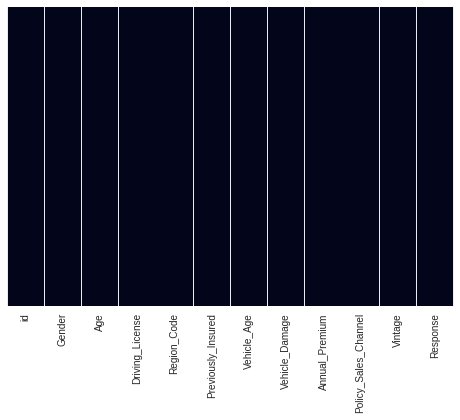

In [351]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

No completlely duplicated Rows and no missing data

In [352]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,"381,109.0000","381,109.0000","381,109.0000","381,109.0000","381,109.0000","381,109.0000","381,109.0000","381,109.0000","381,109.0000"
mean,"190,555.0000",38.8226,0.9979,26.3888,0.4582,"30,564.3896",112.0343,154.3474,0.1226
std,"110,016.8362",15.5116,0.0461,13.2299,0.4983,"17,213.1551",54.2040,83.6713,0.3279
min,1.0000,20.0000,0.0000,0.0000,0.0000,"2,630.0000",1.0000,10.0000,0.0000
25%,"95,278.0000",25.0000,1.0000,15.0000,0.0000,"24,405.0000",29.0000,82.0000,0.0000
50%,"190,555.0000",36.0000,1.0000,28.0000,0.0000,"31,669.0000",133.0000,154.0000,0.0000
75%,"285,832.0000",49.0000,1.0000,35.0000,1.0000,"39,400.0000",152.0000,227.0000,0.0000
max,"381,109.0000",85.0000,1.0000,52.0000,1.0000,"540,165.0000",163.0000,299.0000,1.0000


## EDA <a id='index04'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

### Each feature individually <a id='index05'></a> 

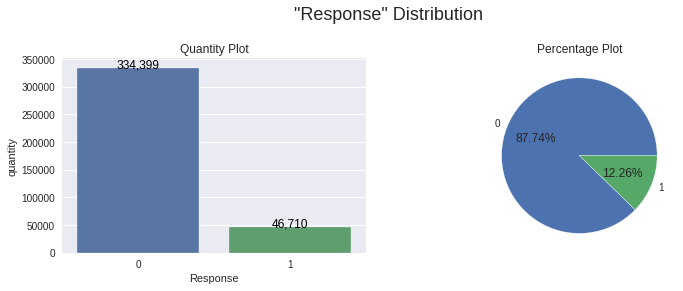

In [353]:
eda_categ_feat_desc_plot(df['Response'], ' "Response" Distribution')

In [354]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

print("\nStrings Variables:\n=>", qualitative,
      "\n\nNumerics Variables:\n=>", quantitative)


Strings Variables:
=> ['Gender', 'Vehicle_Age', 'Vehicle_Damage'] 

Numerics Variables:
=> ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


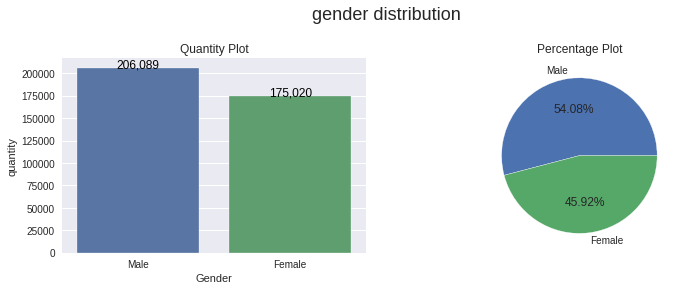

In [355]:
eda_categ_feat_desc_plot(df['Gender'], title='gender distribution')

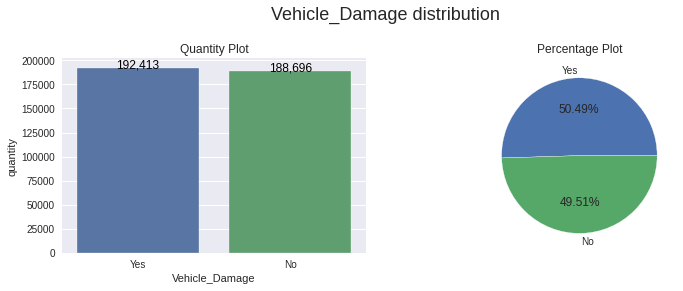

In [356]:
eda_categ_feat_desc_plot(df['Vehicle_Damage'], title='Vehicle_Damage distribution')

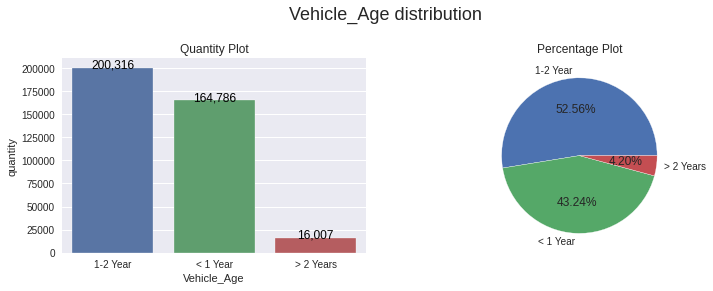

In [357]:
eda_categ_feat_desc_plot(df['Vehicle_Age'], title='Vehicle_Age distribution')

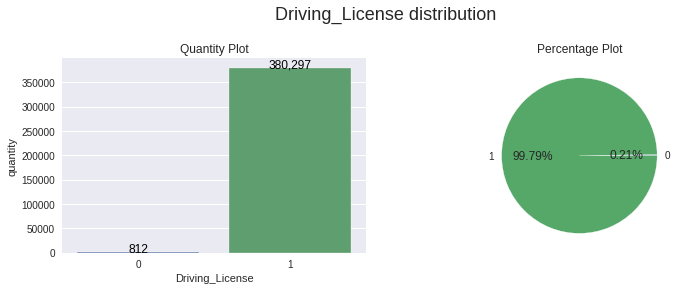

In [358]:
eda_categ_feat_desc_plot(df['Driving_License'], title='Driving_License distribution', fix_labels=True)

def eda_numerical_feat(series, title="", with_label=True, number_format="", show_describe=False, size_labels=10):


Numerics Variables:
=> ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

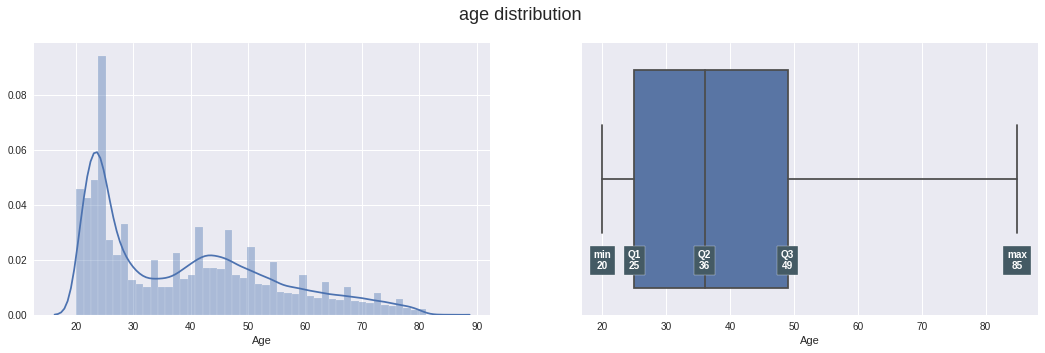

In [359]:
eda_numerical_feat(df['Age'], title='age distribution', number_format='{:.0f}')

In [360]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

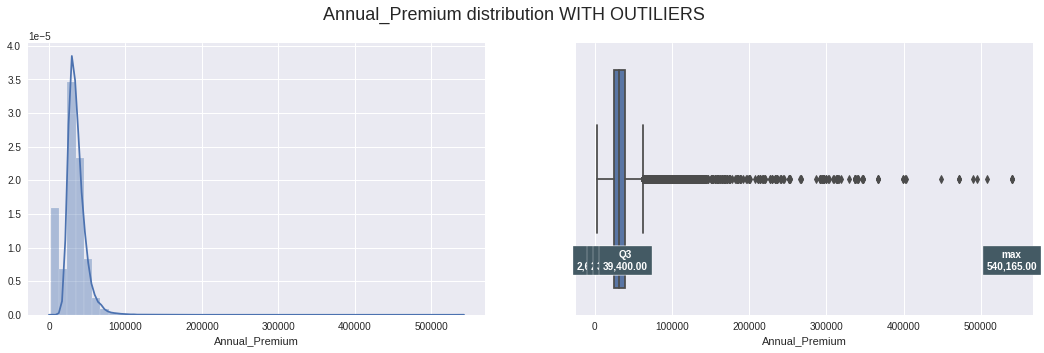

In [361]:
eda_numerical_feat(df['Annual_Premium'], title='Annual_Premium distribution WITH OUTILIERS', number_format='{:,.2f}')

Percentiles: 25th=24405.000, 75th=39400.000, IQR=14995.000
Cut Off: below than 1912.5 and above than 61892.5
Identified outliers: 10,320 that are 2.71% of total data
Non-outlier observations: 370,789


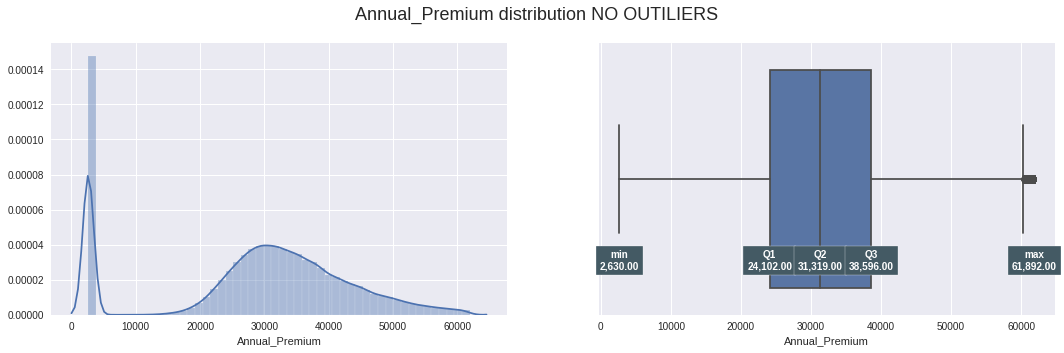

In [362]:
eda_numerical_feat(series_remove_outiliers(df['Annual_Premium']), title='Annual_Premium distribution NO OUTILIERS', number_format='{:,.2f}')

In [363]:
(df['Policy_Sales_Channel'].value_counts() > 10).sum()

111

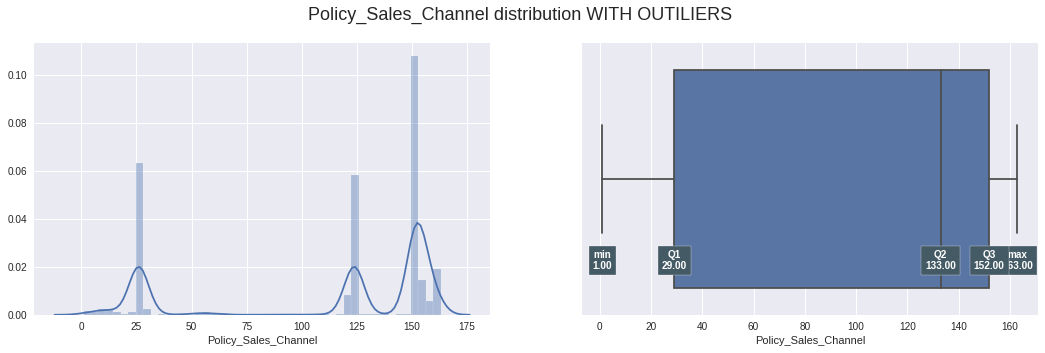

In [364]:
# Policy_Sales_Channel
eda_numerical_feat(df['Policy_Sales_Channel'], title='Policy_Sales_Channel distribution WITH OUTILIERS', number_format='{:,.2f}')

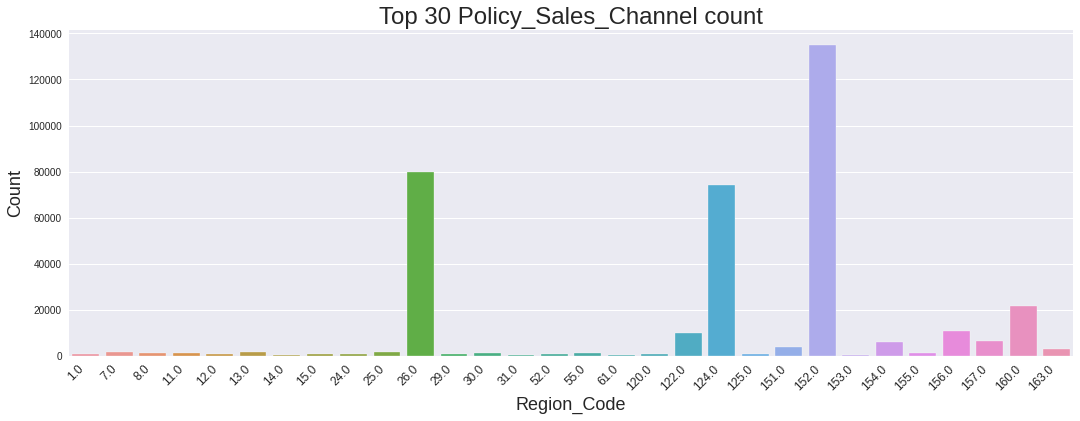

In [365]:
afilter = df["Policy_Sales_Channel"].value_counts().nlargest(30).index.tolist()

fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x=df[ df['Policy_Sales_Channel'].isin(afilter)]["Policy_Sales_Channel"] )
plt.title("Top 30 Policy_Sales_Channel count", fontsize=24)
plt.xlabel('Region_Code', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.show()

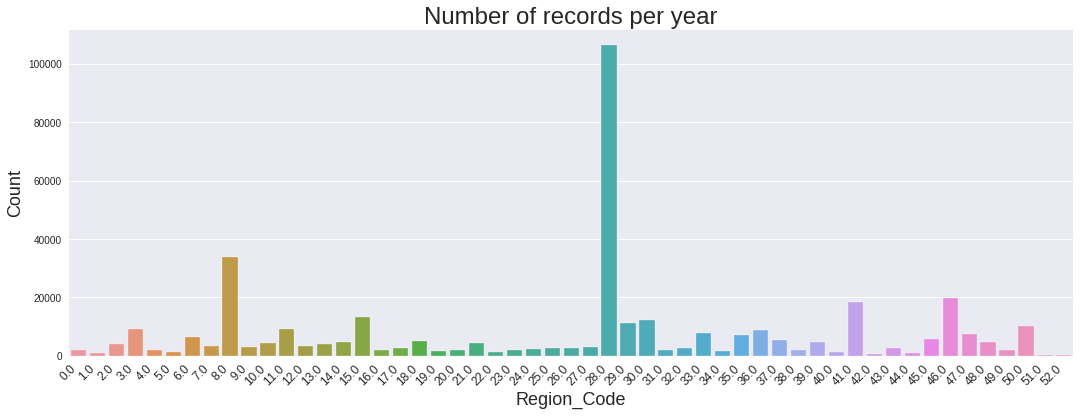

In [366]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x="Region_Code", data=df)
plt.title("Number of records per year", fontsize=24)
plt.xlabel('Region_Code', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.show()

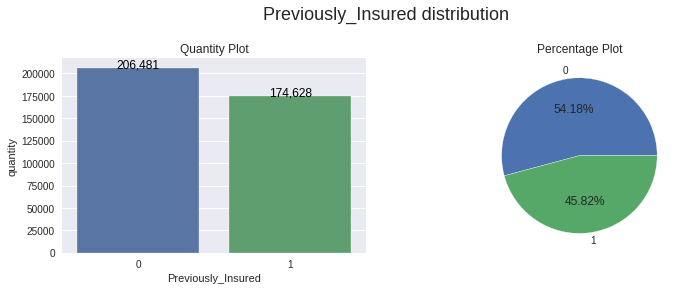

In [367]:
# Previously_Insured

eda_categ_feat_desc_plot(df['Previously_Insured'], title='Previously_Insured distribution')

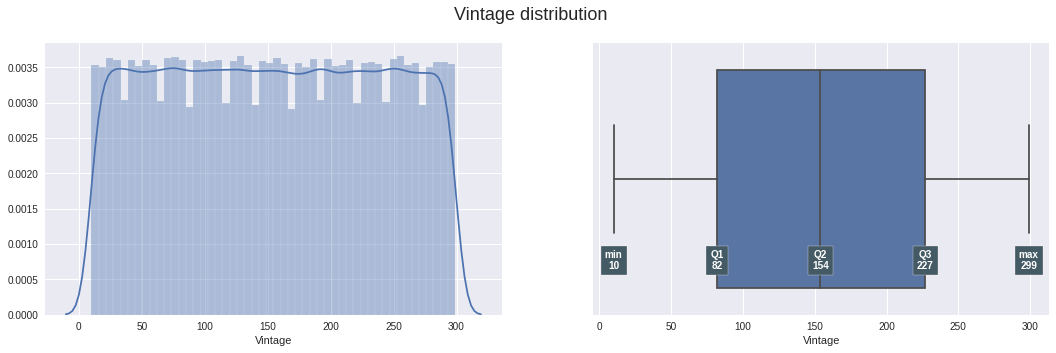

In [368]:
eda_numerical_feat(df['Vintage'], title='Vintage distribution', number_format='{:.0f}')

### Feature by Target: Response <a id='index06'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

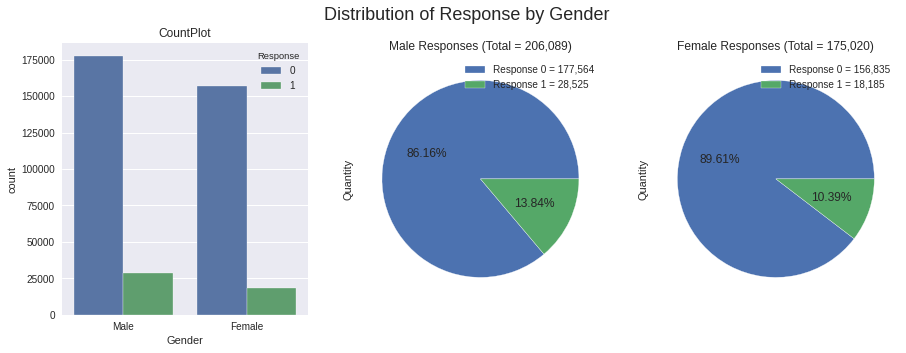

In [369]:
df1 = df.groupby(['Gender', 'Response']).count().reset_index().rename({"Firstname": "Quantity"}, axis=1)
df1 = df1.drop( df1.columns.tolist()[3::], axis=1)
df1 = df1.rename({df1.columns[2]: 'Quantity'},axis=1)

f, (ax3, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 5), sharex=False)
f.suptitle('Distribution of Response by Gender', fontsize=18)

sns.countplot(x="Gender", data=df, hue='Response', ax=ax3)
ax3.set_title('CountPlot')

alist = df1['Quantity'].tolist()

df1.query('Gender == "Male"').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[2]),
                                                 'Response 1 = {:,d}'.format(alist[3])],
                                       title="Male Responses (Total = {:,d})".format(alist[2] + alist[3]),
                                       ax=ax1, labeldistance=None)

df1.query('Gender == "Female"').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[0]),
                                                 'Response 1 = {:,d}'.format(alist[1])],
                                       title="Female Responses (Total = {:,d})".format(alist[0] + alist[1]),
                                       ax=ax2, labeldistance=None)

plt.show()

In [370]:
# Vehicle_Damage

In [371]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0000,0,> 2 Years,Yes,"40,454.0000",26.0000,217,1
1,2,Male,76,1,3.0000,0,1-2 Year,No,"33,536.0000",26.0000,183,0
2,3,Male,47,1,28.0000,0,> 2 Years,Yes,"38,294.0000",26.0000,27,1
3,4,Male,21,1,11.0000,1,< 1 Year,No,"28,619.0000",152.0000,203,0
4,5,Female,29,1,41.0000,1,< 1 Year,No,"27,496.0000",152.0000,39,0


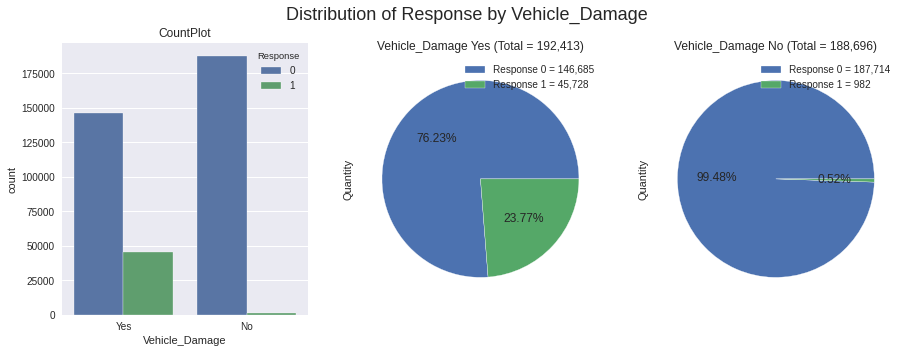

In [372]:
df1 = df.groupby(['Vehicle_Damage', 'Response']).count().reset_index().rename({"Firstname": "Quantity"}, axis=1)
df1 = df1.drop( df1.columns.tolist()[3::], axis=1)
df1 = df1.rename({df1.columns[2]: 'Quantity'},axis=1)

f, (ax3, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 5), sharex=False)
f.suptitle('Distribution of Response by Vehicle_Damage', fontsize=18)

sns.countplot(x="Vehicle_Damage", data=df, hue='Response', ax=ax3)
ax3.set_title('CountPlot')

alist = df1['Quantity'].tolist()

df1.query('Vehicle_Damage == "Yes"').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[2]),
                                                 'Response 1 = {:,d}'.format(alist[3])],
                                       title="Vehicle_Damage Yes (Total = {:,d})".format(alist[2] + alist[3]),
                                       ax=ax1, labeldistance=None)

df1.query('Vehicle_Damage == "No"').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[0]),
                                                 'Response 1 = {:,d}'.format(alist[1])],
                                       title="Vehicle_Damage No (Total = {:,d})".format(alist[0] + alist[1]),
                                       ax=ax2, labeldistance=None)

plt.show()

In [373]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

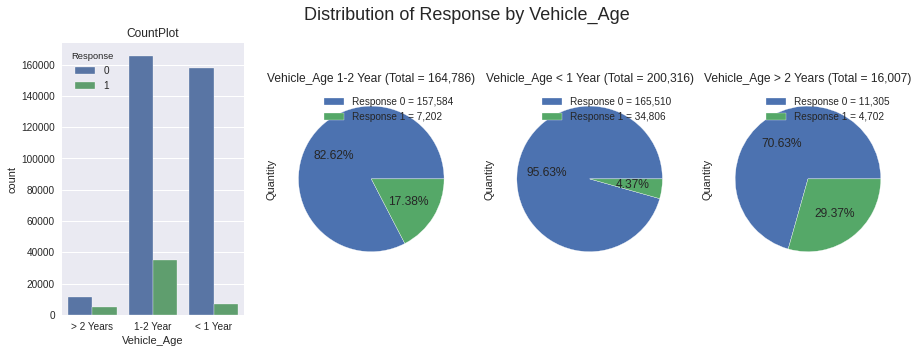

In [374]:
df1 = df.groupby(['Vehicle_Age', 'Response']).count().reset_index().rename({"Firstname": "Quantity"}, axis=1)
df1 = df1.drop( df1.columns.tolist()[3::], axis=1)
df1 = df1.rename({df1.columns[2]: 'Quantity'},axis=1)

f, (ax3, ax1, ax2, ax4) = plt.subplots(ncols=4, figsize=(20, 5), sharex=False)
f.suptitle('Distribution of Response by Vehicle_Age', fontsize=18)

sns.countplot(x="Vehicle_Age", data=df, hue='Response', ax=ax3)
ax3.set_title('CountPlot')

alist = df1['Quantity'].tolist()

df1.query('Vehicle_Age == "1-2 Year"').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[2]),
                                                 'Response 1 = {:,d}'.format(alist[3])],
                                       title="Vehicle_Age 1-2 Year (Total = {:,d})".format(alist[2] + alist[3]),
                                       ax=ax1, labeldistance=None)

df1.query('Vehicle_Age == "< 1 Year"').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[0]),
                                                 'Response 1 = {:,d}'.format(alist[1])],
                                       title="Vehicle_Age < 1 Year (Total = {:,d})".format(alist[0] + alist[1]),
                                       ax=ax2, labeldistance=None)

df1.query('Vehicle_Age == "> 2 Years"').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[4]),
                                                 'Response 1 = {:,d}'.format(alist[5])],
                                       title="Vehicle_Age > 2 Years (Total = {:,d})".format(alist[4] + alist[5]),
                                       ax=ax4, labeldistance=None)

plt.show()

In [375]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0000,0,> 2 Years,Yes,"40,454.0000",26.0000,217,1
1,2,Male,76,1,3.0000,0,1-2 Year,No,"33,536.0000",26.0000,183,0
2,3,Male,47,1,28.0000,0,> 2 Years,Yes,"38,294.0000",26.0000,27,1
3,4,Male,21,1,11.0000,1,< 1 Year,No,"28,619.0000",152.0000,203,0
4,5,Female,29,1,41.0000,1,< 1 Year,No,"27,496.0000",152.0000,39,0


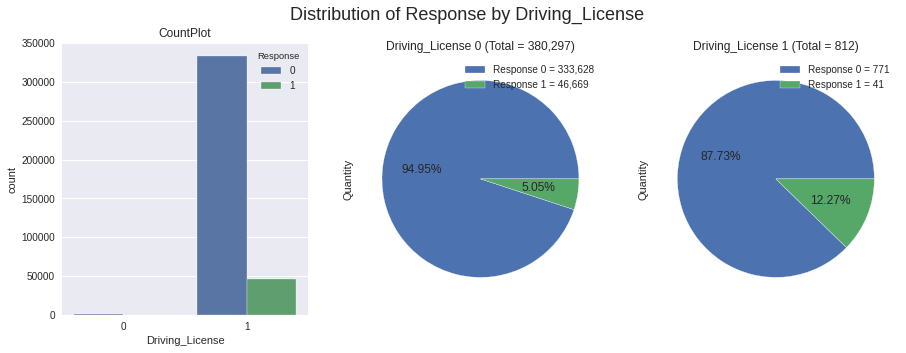

In [376]:
df1 = df.groupby(['Driving_License', 'Response']).count().reset_index().rename({"Firstname": "Quantity"}, axis=1)
df1 = df1.drop( df1.columns.tolist()[3::], axis=1)
df1 = df1.rename({df1.columns[2]: 'Quantity'},axis=1)

f, (ax3, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 5), sharex=False)
f.suptitle('Distribution of Response by Driving_License', fontsize=18)

sns.countplot(x="Driving_License", data=df, hue='Response', ax=ax3)
ax3.set_title('CountPlot')

alist = df1['Quantity'].tolist()

df1.query('Driving_License == 0').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[2]),
                                                 'Response 1 = {:,d}'.format(alist[3])],
                                       title="Driving_License 0 (Total = {:,d})".format(alist[2] + alist[3]),
                                       ax=ax1, labeldistance=None)

df1.query('Driving_License == 1').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[0]),
                                                 'Response 1 = {:,d}'.format(alist[1])],
                                       title="Driving_License 1 (Total = {:,d})".format(alist[0] + alist[1]),
                                       ax=ax2, labeldistance=None)

plt.show()

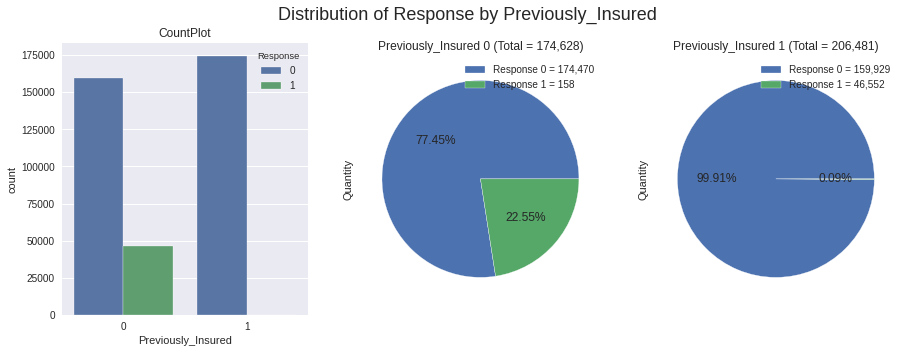

In [377]:
# Previously_Insured

df1 = df.groupby(['Previously_Insured', 'Response']).count().reset_index().rename({"Firstname": "Quantity"}, axis=1)
df1 = df1.drop( df1.columns.tolist()[3::], axis=1)
df1 = df1.rename({df1.columns[2]: 'Quantity'},axis=1)

f, (ax3, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 5), sharex=False)
f.suptitle('Distribution of Response by Previously_Insured', fontsize=18)

sns.countplot(x="Previously_Insured", data=df, hue='Response', ax=ax3)
ax3.set_title('CountPlot')

alist = df1['Quantity'].tolist()

df1.query('Previously_Insured == 0').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[2]),
                                                 'Response 1 = {:,d}'.format(alist[3])],
                                       title="Previously_Insured 0 (Total = {:,d})".format(alist[2] + alist[3]),
                                       ax=ax1, labeldistance=None)

df1.query('Previously_Insured == 1').plot.pie(y='Quantity', figsize=(15, 5), autopct='%1.2f%%', 
                                       labels = ['Response 0 = {:,d}'.format(alist[0]),
                                                 'Response 1 = {:,d}'.format(alist[1])],
                                       title="Previously_Insured 1 (Total = {:,d})".format(alist[0] + alist[1]),
                                       ax=ax2, labeldistance=None)

plt.show()

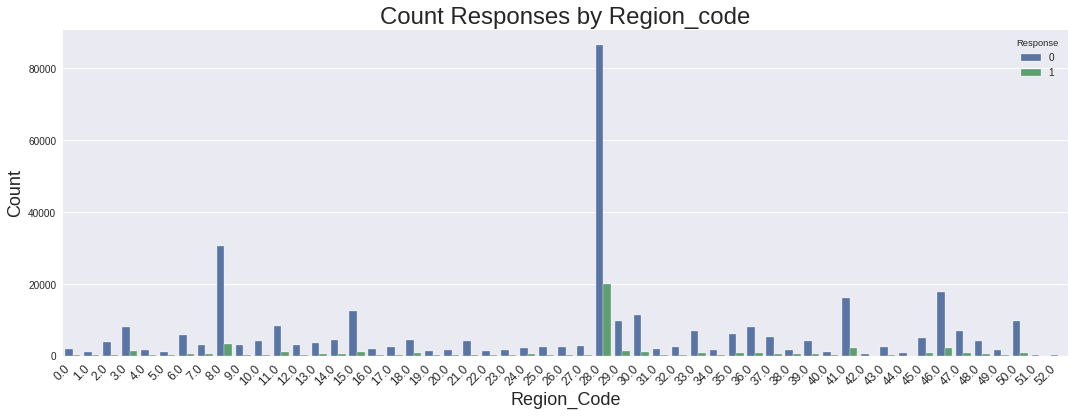

In [378]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x="Region_Code", hue='Response', data=df)
plt.title("Count Responses by Region_code", fontsize=24)
plt.xlabel('Region_Code', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.show()

In [379]:
regions_code = df['Region_Code'].unique()
regions_code

gb = df.groupby(['Region_Code','Response']).count().reset_index()

sum_by_region_code = df['Region_Code'].value_counts().reset_index().rename({'index': 'Region_Codes', 'Region_Code': 'Count'}, axis=1)
sum_by_region_code

adict = {}
for index, row in sum_by_region_code.iterrows():
    index = row['Region_Codes']
    count_0 = int(gb.query('Response == 0 & Region_Code == ' + str(index))['Gender'])
    count_1 = int(gb.query('Response == 1 & Region_Code == ' + str(index))['Gender'])
    adict[index] = [count_0, count_0/row['Count'], count_1, count_1/row['Count'], ]

adict
apandas = pd.DataFrame(adict.values(), columns=['count_0', '%0', 'count_1', '%1'], index=adict.keys()).reset_index()

final_df = sum_by_region_code.merge(apandas,left_on='Region_Codes', right_on='index').drop(['index'], axis=1).sort_values(by='%1', ascending=False)
final_df

,Region_Codes,Count,count_0,%0,count_1,%1
35,38.0000,2026,1637,0.8080,389,0.1920
0,28.0000,106415,86498,0.8128,19917,0.1872
44,19.0000,1535,1285,0.8371,250,0.1629
42,4.0000,1801,1516,0.8418,285,0.1582
39,23.0000,1960,1660,0.8469,300,0.1531
52,51.0000,183,155,0.8470,28,0.1530
34,24.0000,2415,2073,0.8584,342,0.1416
25,7.0000,3279,2847,0.8683,432,0.1317
17,18.0000,5153,4475,0.8684,678,0.1316
8,3.0000,9251,8070,0.8723,1181,0.1277


In [380]:
gb.query('Response == 0 & Region_Code == ' + str(28.0))

,Region_Code,Response,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
56,28.0000,0,86498,86498,86498,86498,86498,86498,86498,86498,86498,86498


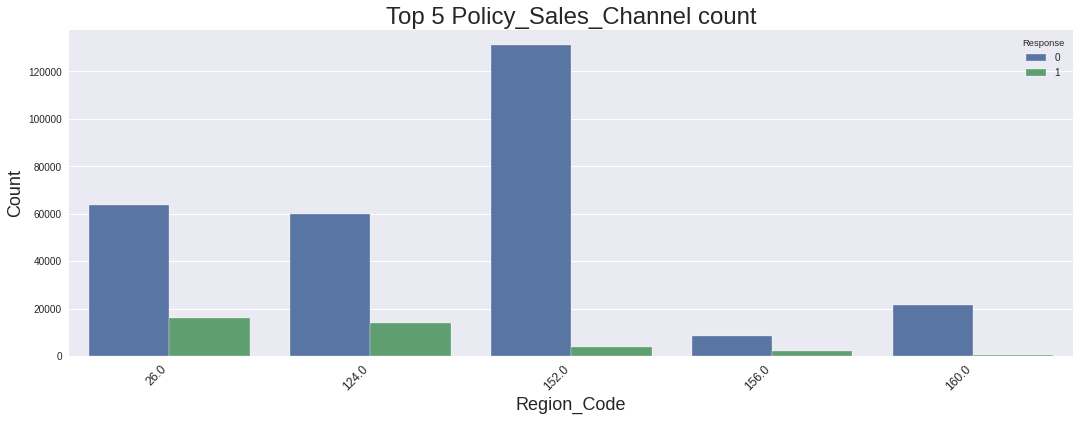

In [381]:
afilter = df["Policy_Sales_Channel"].value_counts().nlargest(5).index.tolist()
df_filted = df[ df['Policy_Sales_Channel'].isin(afilter) ] 

fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='Policy_Sales_Channel', hue='Response', data=df_filted)
plt.title("Top 5 Policy_Sales_Channel count", fontsize=24)
plt.xlabel('Region_Code', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.show()

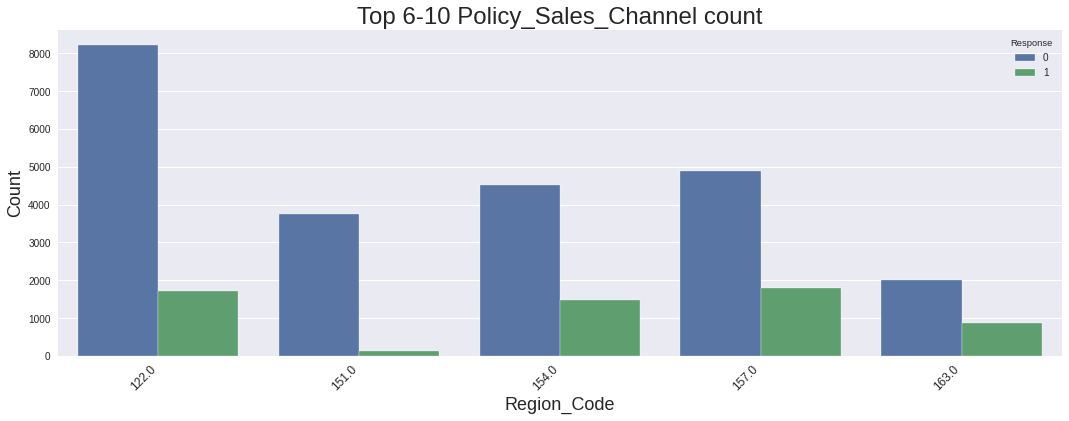

In [382]:
removes_fists = df["Policy_Sales_Channel"].value_counts().nlargest(5).index.tolist()
afilter = df["Policy_Sales_Channel"].value_counts().nlargest(10).drop(removes_fists).index.tolist()

df_filted = df[ df['Policy_Sales_Channel'].isin(afilter) ] 

fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='Policy_Sales_Channel', hue='Response', data=df_filted)
plt.title("Top 6-10 Policy_Sales_Channel count", fontsize=24)
plt.xlabel('Region_Code', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.show()

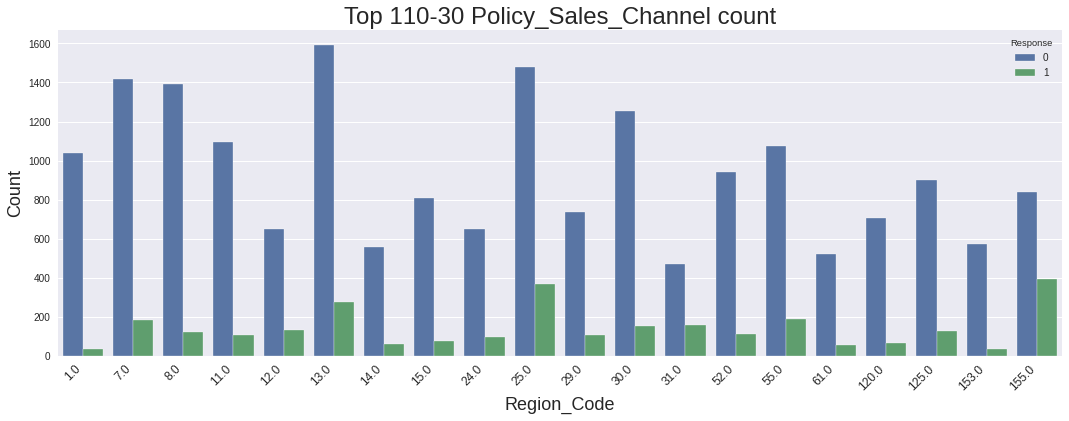

In [383]:
removes_fists = df["Policy_Sales_Channel"].value_counts().nlargest(10).index.tolist()
afilter = df["Policy_Sales_Channel"].value_counts().nlargest(30).drop(removes_fists).index.tolist()

df_filted = df[ df['Policy_Sales_Channel'].isin(afilter) ] 

fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='Policy_Sales_Channel', hue='Response', data=df_filted)
plt.title("Top 110-30 Policy_Sales_Channel count", fontsize=24)
plt.xlabel('Region_Code', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.show()

In [384]:
gb = df.groupby(['Policy_Sales_Channel','Response']).count().reset_index()

sum_by_region_code = df['Policy_Sales_Channel'].value_counts().reset_index().rename(
    {'index': 'Policy_Sales_Channels', 'Policy_Sales_Channel': 'Count'}, axis=1)

adict = {}
for _, row in sum_by_region_code.iterrows():
    index = row['Policy_Sales_Channels']
    
    query0 = gb.query('Response == 0 & Policy_Sales_Channel == ' + str(index))['Gender']
    count_0 = 0 if len(query0) == 0 else int(query0)
    query1 = gb.query('Response == 1 & Policy_Sales_Channel == ' + str(index))['Gender']
    count_1 = 0 if len(query1) == 0 else int(query1)

    adict[index] = [count_0, count_0/row['Count'], count_1, count_1/row['Count'], ]

apandas = pd.DataFrame(data=adict.values(), index=adict.keys(),
                      columns=['count_0', '%0', 'count_1', '%1'] ).reset_index()

final_df = sum_by_region_code.merge(apandas, left_on='Policy_Sales_Channels', right_on='index').drop(
    ['index'], axis=1).sort_values(by='%1', ascending=False)
final_df

,Policy_Sales_Channels,Count,count_0,%0,count_1,%1
154,43.0000,1,0,0.0000,1,1.0000
149,123.0000,1,0,0.0000,1,1.0000
140,27.0000,3,2,0.6667,1,0.3333
143,28.0000,3,2,0.6667,1,0.3333
75,36.0000,52,35,0.6731,17,0.3269
...,...,...,...,...,...,...
131,76.0000,4,4,1.0000,0,0.0000
132,67.0000,4,4,1.0000,0,0.0000
133,115.0000,4,4,1.0000,0,0.0000
98,96.0000,16,16,1.0000,0,0.0000


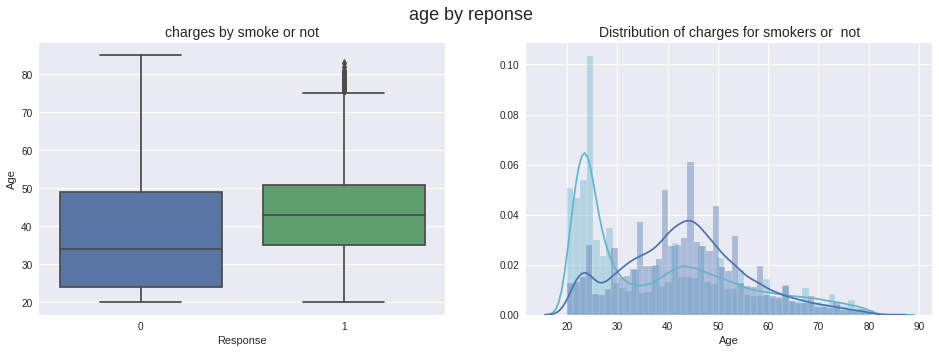

In [385]:
fig, (ax1, ax2) = plt.subplots(figsize = (16,5), ncols=2, sharex=False, sharey=False)

font_size = 14
fig.suptitle('age by reponse', fontsize=18)

sns.boxplot(x="Response", y="Age", data=df, ax=ax1)
sns.distplot(df[(df.Response == 0)]["Age"],color='c',ax=ax2, label='Response 0')
sns.distplot(df[(df.Response == 1)]['Age'],color='b',ax=ax2, label='Response 1')

ax1.set_title('charges by smoke or not', fontsize=font_size)
ax2.set_title('Distribution of charges for smokers or  not', fontsize=font_size)
plt.show()

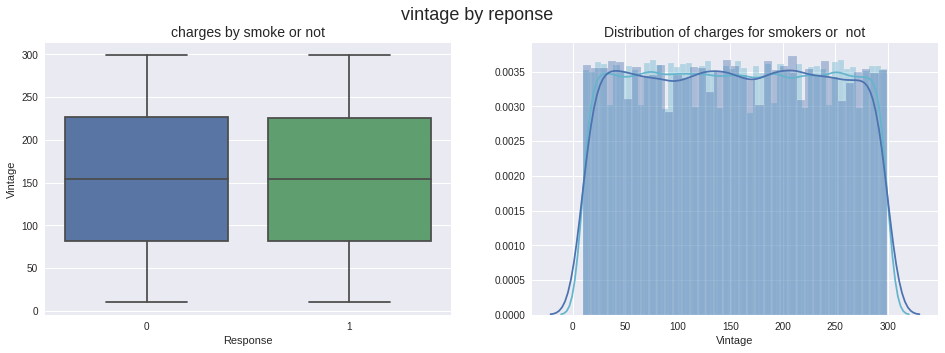

In [386]:
fig, (ax1, ax2) = plt.subplots(figsize = (16,5), ncols=2, sharex=False, sharey=False)

font_size = 14
fig.suptitle('vintage by reponse', fontsize=18)

sns.boxplot(x="Response", y="Vintage", data=df, ax=ax1)
sns.distplot(df[(df.Response == 0)]["Vintage"],color='c',ax=ax2, label='Response 0')
sns.distplot(df[(df.Response == 1)]['Vintage'],color='b',ax=ax2, label='Response 1')

ax1.set_title('charges by smoke or not', fontsize=font_size)
ax2.set_title('Distribution of charges for smokers or  not', fontsize=font_size)
plt.show()

Percentiles: 25th=24405.000, 75th=39400.000, IQR=14995.000
Cut Off: below than 1912.5 and above than 61892.5
Identified outliers: 10,320 that are 2.71% of total data
Non-outlier observations: 370,789


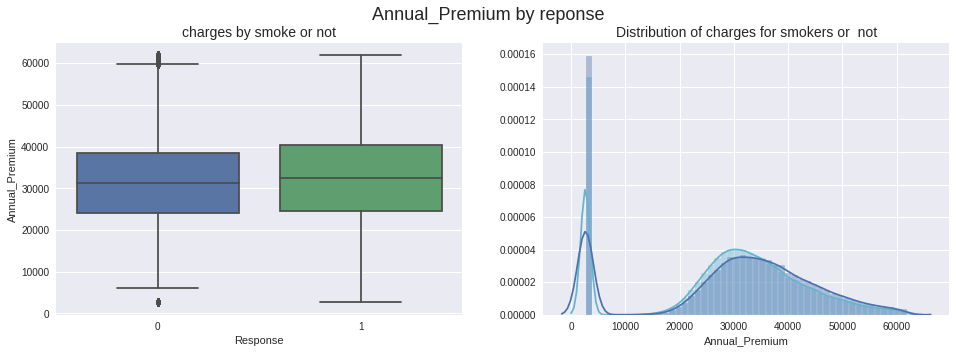

In [387]:
df2 = df.copy()
df2['Annual_Premium'] = series_remove_outiliers(df['Annual_Premium'])

fig, (ax1, ax2) = plt.subplots(figsize = (16,5), ncols=2, sharex=False, sharey=False)

font_size = 14
fig.suptitle('Annual_Premium by reponse', fontsize=18)

sns.boxplot(x="Response", y="Annual_Premium", data=df2, ax=ax1)
sns.distplot(df2[(df2.Response == 0)]["Annual_Premium"],color='c',ax=ax2, label='Response 0')
sns.distplot(df2[(df2.Response == 1)]['Annual_Premium'],color='b',ax=ax2, label='Response 1')

ax1.set_title('charges by smoke or not', fontsize=font_size)
ax2.set_title('Distribution of charges for smokers or  not', fontsize=font_size)
plt.show()

## Correlations <a id='index07'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

### Corr to PolicySalesChannel as Categorical Feature <a id='index08'></a> 

In [388]:
df1 = df.copy()

gender = {'Male': 0, 'Female': 1}
driving_license = {0: 0, 1: 1}
previously_insured = {0: 1, 1: 0}
vehicle_age = {'> 2 Years': 3, '1-2 Year': 2, '< 1 Year': 1}
vehicle_damage = {'Yes': 1, 'No': 0}

df1['Gender'] = df1['Gender'].replace(gender)
df1['Driving_License'] = df1['Driving_License'].replace(driving_license)
df1['Previously_Insured'] = df1['Previously_Insured'].replace(previously_insured)
df1['Vehicle_Age'] = df1['Vehicle_Age'].replace(vehicle_age)
df1['Vehicle_Damage'] = df1['Vehicle_Damage'].replace(vehicle_damage)
df1 = df1.drop(['id'],axis=1)

df2, df3 = df1.copy(), df1.copy()

In [390]:
df1['Policy_Sales_Channel'] = df1['Policy_Sales_Channel'].astype('int32').astype('object')
df1 = pd.concat([df1, pd.get_dummies(df['Policy_Sales_Channel'], prefix='PSC')], axis=1)
df1.iloc[:, 10:25].head(3) # 15 columns of Policy_Sales_Channel as OneHotEncoding

,Response,PSC_1.0,PSC_2.0,PSC_3.0,PSC_4.0,PSC_6.0,PSC_7.0,PSC_8.0,PSC_9.0,PSC_10.0,PSC_11.0,PSC_12.0,PSC_13.0,PSC_14.0,PSC_15.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


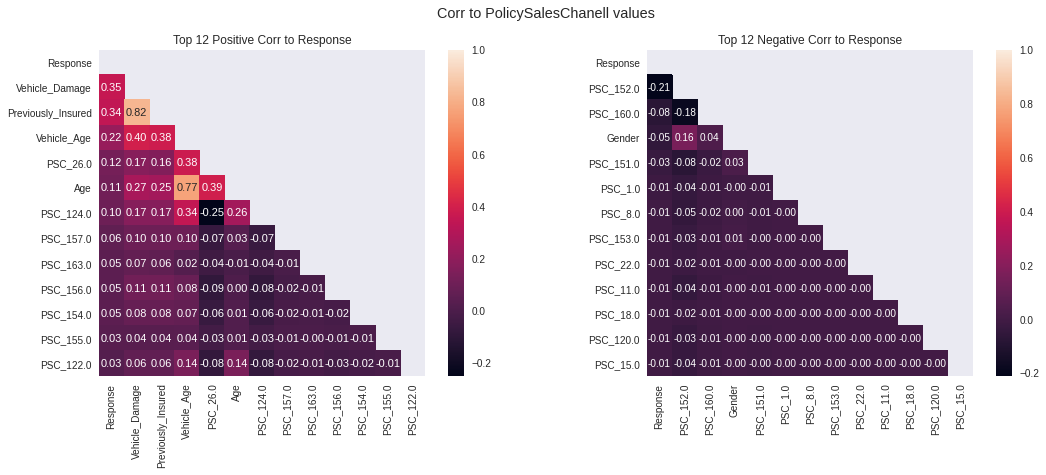

In [391]:
plot_top_bottom_rank_correlation(df1, 'Response', top_rank=12, title='Corr to PolicySalesChanell values')

Bigs Corr: PSC_151, PSC_26, PSC_124, PSC_160

### Corr to RegionCode as Categorical Feature <a id='index09'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [392]:
df2['Region_Code'] = df2['Region_Code'].astype('int32').astype('object')
df2 = pd.concat([df2, pd.get_dummies(df['Region_Code'], prefix='RC')], axis=1)
df2.iloc[:, 10:25].head(3) # 15 columns of RegionCode as OneHotEncoding

,Response,RC_0.0,RC_1.0,RC_2.0,RC_3.0,RC_4.0,RC_5.0,RC_6.0,RC_7.0,RC_8.0,RC_9.0,RC_10.0,RC_11.0,RC_12.0,RC_13.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


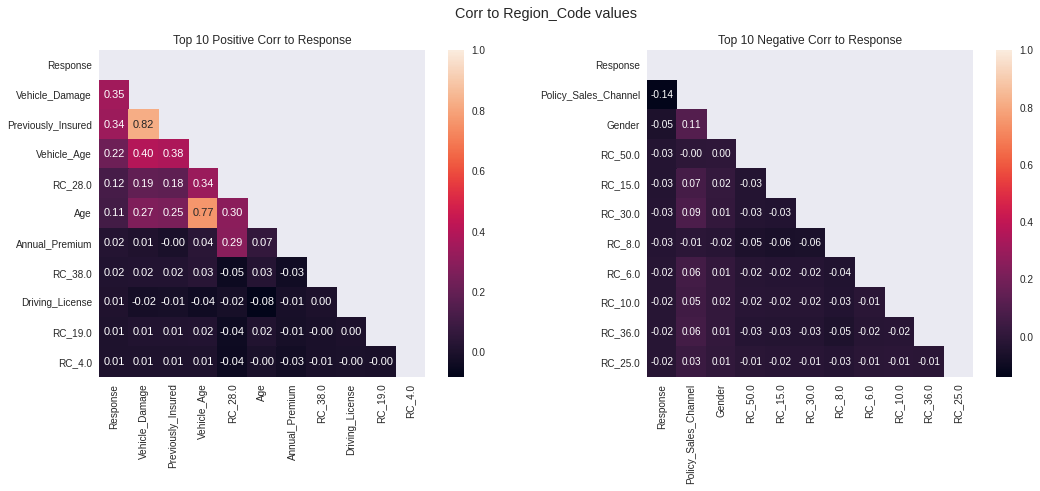

In [393]:
plot_top_bottom_rank_correlation(df2, 'Response', top_rank=10, title='Corr to Region_Code values')

Big Corr to Region Codes : RC_28

### All Corr <a id='index10'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>


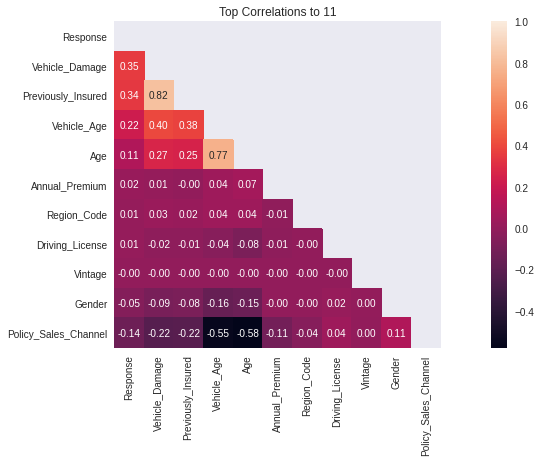

In [394]:
plot_top_rank_correlation(df3, 'Response')

## Pre Processing <a id='index11'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

Normal dist. (mu= 30,564.39 and sigma= 17,213.13 )
Skewness: 1.77 | Kurtosis: 34.00
Evaluate skewness: highly skewed
	=> positively skewed or right-skewed
	=> in case of positive skewness, log transformations usually works well.
	=> np.log(), np.log1(), boxcox1p()
evaluate kurtoise
	=> Leptokurtic: anormal: Peak is higher


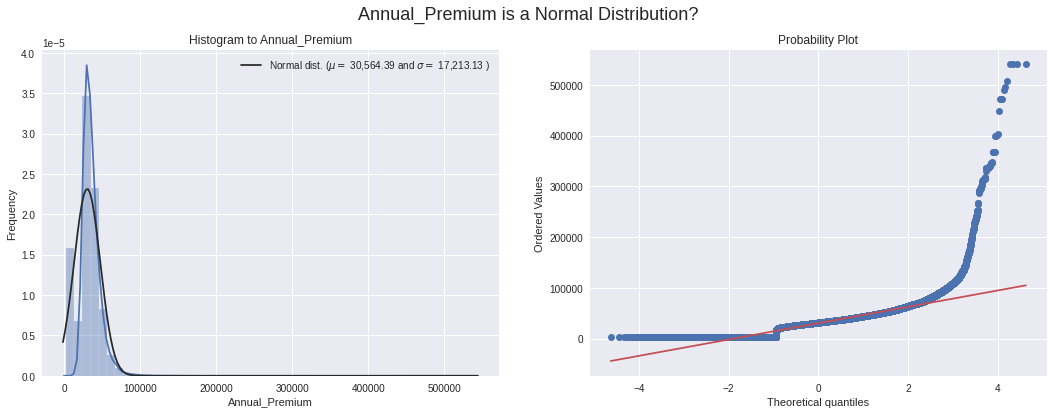

In [395]:
test_normal_distribution(df['Annual_Premium'], 'Annual_Premium')

Normal dist. (mu= 10.01 and sigma= 1.01 )
Skewness: -1.47 | Kurtosis: 0.66
Evaluate skewness: highly skewed
	=> negatively skewed or left-skewed
evaluate kurtoise
	=> Platykurtic: anormal: The peak is lower


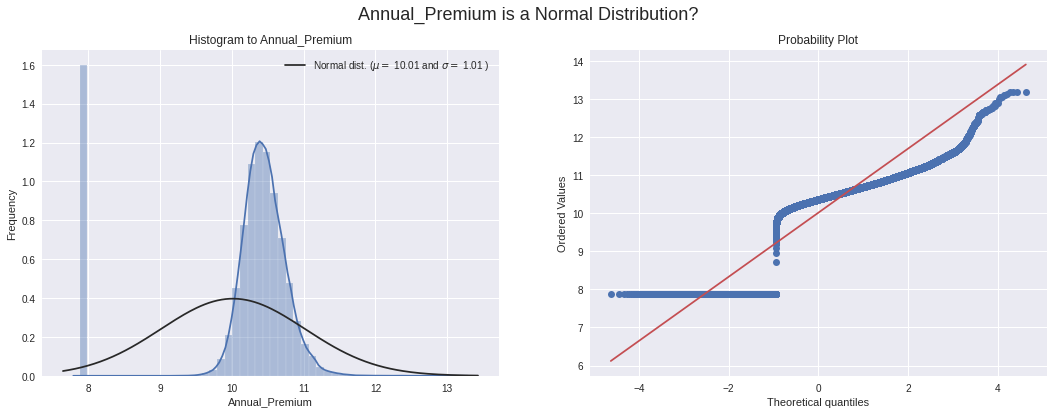

In [397]:
# df['Annual_Premium'] = boxcox1p(df['Annual_Premium'], boxcox_normmax(df['Annual_Premium'] + 1))
df['Annual_Premium'] = df['Annual_Premium'].apply(np.log)
test_normal_distribution(df['Annual_Premium'], 'Annual_Premium')

In [398]:
gender = {'Male': 0, 'Female': 1}
driving_license = {0: 0, 1: 1}
previously_insured = {0: 1, 1: 0}
vehicle_age = {'> 2 Years': 3, '1-2 Year': 2, '< 1 Year': 1}
vehicle_damage = {'Yes': 1, 'No': 0}

df['Gender'] = df['Gender'].replace(gender)
df['Driving_License'] = df['Driving_License'].replace(driving_license)
df['Previously_Insured'] = df['Previously_Insured'].replace(previously_insured)
df['Vehicle_Age'] = df['Vehicle_Age'].replace(vehicle_age)
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace(vehicle_damage)

df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].apply(lambda x: np.int(x))
df['Region_Code'] = df['Region_Code'].apply(lambda x: np.int(x))

df = df.drop(['id'],axis=1)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28,1,3,1,10.6079,26,217,1
1,0,76,1,3,1,2,0,10.4204,26,183,0
2,0,47,1,28,1,3,1,10.5530,26,27,1
3,0,21,1,11,0,1,0,10.2618,152,203,0
4,1,29,1,41,0,1,0,10.2218,152,39,0


### Others Pre Procesing

In [ ]:
# OnetHotEndonding to Bigs Coor of 'Policy_Sales_Channel' and 'Region_Code'

In [ ]:
# OneHotEnconding to 'Policy_Sales_Channel' and 'Region_Code'

# df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('int32').astype('object')
# df['Region_Code'] = df['Region_Code'].astype('int32').astype('object')
# df = pd.concat([df, 
#                 pd.get_dummies(df['Region_Code'], prefix='RC'),
#                 pd.get_dummies(df['Policy_Sales_Channel'], prefix='PSC')], axis=1)
# df # df with PSC and RC dummies

## Split Train and Test <a id='index12'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [399]:
from sklearn.model_selection import train_test_split

col_1 = ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
         'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

cat_col = ['Gender','Driving_License', 'Region_Code', 'Previously_Insured',
           'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

X = df[col_1]
# X = df.drop(['Response'], axis=1)

y = df['Response']

x_train, x_test, y_train, y_test = train_test_split(X, y.values, test_size=0.20, random_state=42)

check_balanced_train_test_binary(x_train, y_train, x_test, y_test, len(df), ['Response 0', 'Response 1'])

Original Size: 381,109

Train: must be 80% of dataset:
 the train dataset has 304,887 rows this is (80.00%) of original dataset 
 => Classe 0 (Response 0): 267700 (87.80%) 
 => Classe 1 (Response 1): 37187 (12.20%) 

Test: must be 20% of dataset:
 the test dataset has 76,222 rows this is (20.00%) of original dataset 
 => Classe 0 (Response 0): 66699 (87.51%) 
 => Classe 1 (Response 1): 9523 (12.49%)


## Handle Unbalanced DataSet <a id='index13'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [400]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek # over and under sampling
from imblearn.metrics import classification_report_imbalanced

imb_models = {
    'ADASYN': ADASYN(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'SMOTEENN': SMOTEENN("minority", random_state=42),
    'SMOTETomek': SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}

imb_strategy = "None"

if(imb_strategy != "None"):
    before = x_train.shape[0]
    imb_tranformer = imb_models[imb_strategy]
    x_train, y_train = imb_tranformer.fit_sample(x_train, y_train)
    print("train dataset before: {:,d}\nimbalanced_strategy: {}".format(before, imb_strategy),
          "\ntrain dataset after: {:,d}\ngenerate: {:,d}".format(x_train.shape[0], x_train.shape[0] - before))
else:
    print("Dont correct unbalanced dataset")

Dont correct unbalanced dataset


## Develop Model <a id='index14'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

### CV, Fitting and Testing <a id='index15'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [402]:
# Classifier Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Ensemble Classifiers
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Others Linear Classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier

# xboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# scores
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

# neural net of sklearn
from sklearn.neural_network import MLPClassifier

# others
import time
import operator

In [403]:
all_classifiers = {
    "NaiveBayes": GaussianNB(),
#     "Ridge": RidgeClassifier(),
#     "Perceptron": Perceptron(),
#     "PassiveAggr": PassiveAggressiveClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGB": LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1),
    # "SVM": SVC(),
    "LogisiticR": LogisticRegression(),
#     "KNearest": KNeighborsClassifier(),
#     "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(), # All 100 features: 48min
    # "SGDC": SGDClassifier(),
    "GBoost": GradientBoostingClassifier(),
#     "Bagging": BaggingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "ExtraTree": ExtraTreesClassifier()
}

In [404]:
metrics = { 'cv_roc': {}, 'acc_test': {}, 'f1_test': {}, 'roc_auc': {} }
m = list(metrics.keys())
time_start = time.time()
print('CrossValidation, Fitting and Testing')

# Cross Validation, Fit and Test
for name, model in all_classifiers.items():
    print('{:15}'.format(name), end='')
    t0 = time.time()
    # Cross Validation
    training_score = cross_val_score(model, x_train, y_train, scoring="roc_auc", cv=4)
    # Fitting
    all_classifiers[name] = model.fit(x_train, y_train) 
    # Testing
    y_pred = all_classifiers[name].predict(x_test)
    t1 = time.time()
    # Save metrics
    metrics[m[0]][name] = training_score.mean()
    metrics[m[1]][name] = accuracy_score(y_test, y_pred)
    metrics[m[2]][name] = f1_score(y_test, y_pred, average="macro") 
    metrics[m[3]][name] = roc_auc_score(y_test, all_classifiers[name].predict_proba(x_test)[:, 1])
    # Show metrics
    print('| {}: {:6,.4f} | {}: {:6,.4f} | {}: {:6.4f} | {}: {:6.4f} | took: {:>15} |'.format(
        m[0], metrics[m[0]][name], m[1], metrics[m[1]][name],
        m[2], metrics[m[2]][name], m[3], metrics[m[3]][name], time_spent(t0) ))
        
print("\nDone in {}".format(time_spent(time_start)))

CrossValidation, Fitting and Testing
NaiveBayes     | cv_roc: 0.8224 | acc_test: 0.6418 | f1_test: 0.5744 | roc_auc: 0.8256 | took:         0.691 s |
XGBoost        | cv_roc: 0.8547 | acc_test: 0.8748 | f1_test: 0.4910 | roc_auc: 0.8596 | took:        55.237 s |
LightGB        | cv_roc: 0.8576 | acc_test: 0.8752 | f1_test: 0.4791 | roc_auc: 0.8614 | took:        33.404 s |
LogisiticR     | cv_roc: 0.8267 | acc_test: 0.8738 | f1_test: 0.4722 | roc_auc: 0.8316 | took:        13.953 s |
AdaBoost       | cv_roc: 0.8511 | acc_test: 0.8751 | f1_test: 0.4667 | roc_auc: 0.8545 | took:        45.264 s |
GBoost         | cv_roc: 0.8550 | acc_test: 0.8751 | f1_test: 0.4667 | roc_auc: 0.8592 | took:  2 min 48.569 s |
RandomForest   | cv_roc: 0.8327 | acc_test: 0.8659 | f1_test: 0.5564 | roc_auc: 0.8371 | took:  3 min 16.980 s |
ExtraTree      | cv_roc: 0.8235 | acc_test: 0.8598 | f1_test: 0.5669 | roc_auc: 0.8267 | took:  2 min 15.439 s |

Done in 10 min 49.542 s


In [410]:
print("Best cv acc  :", max( metrics[m[0]].items(), key=operator.itemgetter(1) ))
print("Best acc test:", max( metrics[m[1]].items(), key=operator.itemgetter(1) ))
print("Best f1 test :", max( metrics[m[2]].items(), key=operator.itemgetter(1) ))
print("Best roc_auc :", max( metrics[m[3]].items(), key=operator.itemgetter(1) ))

df_metrics = pd.DataFrame(data = [list(metrics[m[0]].values()),
                                  list(metrics[m[1]].values()),
                                  list(metrics[m[2]].values()),
                                  list(metrics[m[3]].values())],
                          index = ['cv_acc', 'acc_test', 'f1_test', 'roc_auc'],
                          columns = metrics[m[0]].keys() ).T.sort_values(by=m[3], ascending=False)
df_metrics

Best cv acc  : ('LightGB', 0.8575546984339458)
Best acc test: ('LightGB', 0.8752459919708221)
Best f1 test : ('NaiveBayes', 0.5744138322569803)
Best roc_auc : ('CatBoost', 0.8614456187530946)


,cv_acc,acc_test,f1_test,roc_auc
CatBoost,0.0000,0.8752,0.4837,0.8614
LightGB,0.8576,0.8752,0.4791,0.8614
XGBoost,0.8547,0.8748,0.4910,0.8596
GBoost,0.8550,0.8751,0.4667,0.8592
AdaBoost,0.8511,0.8751,0.4667,0.8545
RandomForest,0.8327,0.8659,0.5564,0.8371
LogisiticR,0.8267,0.8738,0.4722,0.8316
ExtraTree,0.8235,0.8598,0.5669,0.8267
NaiveBayes,0.8224,0.6418,0.5744,0.8256


````
ALL FEATURES NO DELETE OLDS

CrossValidation, Fitting and Testing :: Done in 107 min 55.379 s 
NaiveBayes     | cv_roc: 0.8116 | acc_test: 0.6690 | f1_test: 0.5880 | roc_auc: 0.8133 | took:        40.241 s |
XGBoost        | cv_roc: 0.8551 | acc_test: 0.8751 | f1_test: 0.4829 | roc_auc: 0.8604 | took:  8 min 29.597 s | Kaggle: 0.8563787188344484
LightGB        | cv_roc: 0.8578 | acc_test: 0.8754 | f1_test: 0.4799 | roc_auc: 0.8619 | took:  1 min 10.827 s | Kaggle: 0.857961964456837
LogisiticR     | cv_roc: 0.8394 | acc_test: 0.8734 | f1_test: 0.4760 | roc_auc: 0.8384 | took:   1 min 9.852 s |
AdaBoost       | cv_roc: 0.8521 | acc_test: 0.8750 | f1_test: 0.4680 | roc_auc: 0.8553 | took: 48 min 14.027 s | Kaggle: 0.8520245528346614
GBoost         | cv_roc: 0.8551 | acc_test: 0.8750 | f1_test: 0.4668 | roc_auc: 0.8590 | took: 25 min 34.422 s | Kaggle: 0.8555352711324061
RandomForest   | cv_roc: 0.8288 | acc_test: 0.8624 | f1_test: 0.5687 | roc_auc: 0.8345 | took:  8 min 57.028 s |
ExtraTree      | cv_roc: 0.8174 | acc_test: 0.8554 | f1_test: 0.5784 | roc_auc: 0.8222 | took: 13 min 39.380 s |
CatBoost no_cat (no delete old) | acc_test: 0.8755 | f1_test: 0.4823 | roc_auc: 0.8621 | took:        40.531 s | Kaggle: 0.858025063578067
````

````
SIMPLES APROACH :: Done in 10 min 49.542 s

CrossValidation, Fitting and Testing
NaiveBayes     | cv_roc: 0.8224 | acc_test: 0.6418 | f1_test: 0.5744 | roc_auc: 0.8256 | took:         0.691 s |
XGBoost        | cv_roc: 0.8547 | acc_test: 0.8748 | f1_test: 0.4910 | roc_auc: 0.8596 | took:        55.237 s | 0.854955240293525
LightGB        | cv_roc: 0.8576 | acc_test: 0.8752 | f1_test: 0.4791 | roc_auc: 0.8614 | took:        33.404 s | 0.8572426398003856.
LogisiticR     | cv_roc: 0.8267 | acc_test: 0.8738 | f1_test: 0.4722 | roc_auc: 0.8316 | took:        13.953 s |
AdaBoost       | cv_roc: 0.8511 | acc_test: 0.8751 | f1_test: 0.4667 | roc_auc: 0.8545 | took:        45.264 s |
GBoost         | cv_roc: 0.8550 | acc_test: 0.8751 | f1_test: 0.4667 | roc_auc: 0.8592 | took:  2 min 48.569 s |
RandomForest   | cv_roc: 0.8327 | acc_test: 0.8659 | f1_test: 0.5564 | roc_auc: 0.8371 | took:  3 min 16.980 s |
ExtraTree      | cv_roc: 0.8235 | acc_test: 0.8598 | f1_test: 0.5669 | roc_auc: 0.8267 | took:  2 min 15.439 s |

CatBoost (no cat features)      | acc_test: 0.8752 | f1_test: 0.4837 | roc_auc: 0.8614 | took:        22.913 s |
CatBoost (cat features)         | acc_test: 0.8757 | f1_test: 0.4842 | roc_auc: 0.8620 | took:        43.988 s | 0.8579703291511471


````

### CatBoost <a id='index16'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [411]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

name = 'CatBoost'
catb = CatBoostClassifier()

t0 = time.time()
# Fitting
# catb = catb.fit(x_train, y_train, eval_set=(x_test, y_test), plot=False, early_stopping_rounds=30,verbose=0)
catb = catb.fit(x_train, y_train, cat_features=cat_col, eval_set=(x_test, y_test), plot=False, early_stopping_rounds=30,verbose=0) 
# Testing
y_pred = catb.predict(x_test)
t1 = time.time()
# Save metrics
metrics[m[0]][name] = 0.0
metrics[m[1]][name] = accuracy_score(y_test, y_pred)
metrics[m[2]][name] = f1_score(y_test, y_pred, average="macro") 
metrics[m[3]][name] = roc_auc_score(y_test, catb.predict_proba(x_test)[:, 1]) 

# Show metrics
print('{:15} | {}: {:6,.4f} | {}: {:6.4f} | {}: {:6.4f} | took: {:>15} |'.format(
    name, m[1], metrics[m[1]][name],
    m[2], metrics[m[2]][name], m[3], metrics[m[3]][name], time_spent(t0) ))

CatBoost        | acc_test: 0.8757 | f1_test: 0.4842 | roc_auc: 0.8620 | took:        43.988 s |


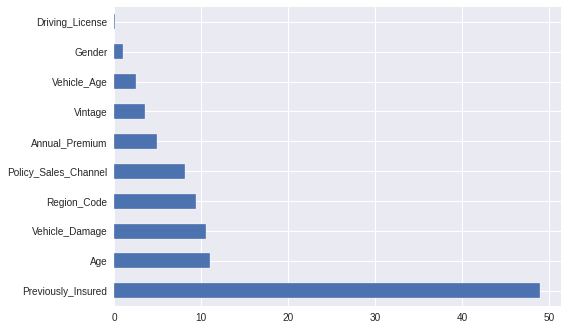

In [407]:
feat_importances = pd.Series(catb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

As mais importnates em all features: \['Previously_Insured', 'Vehicle_Damage', 'Age', 'Annual_Premium', 'PSC_152', 'Vehicle_Age', 'Policy_Sales_Channel', 'Vintage', 'Region_Code', 'PSC_160', 'RC_41', 'RC_8', 'RC_30', 'Gender', 'PSC_26', 'RC_28', 'RC_6', 'RC_11', 'RC_25', 'RC_29'\]

In [408]:
eli5.explain_weights(catb)

Weight,Feature
0.4892,Previously_Insured
0.1099,Age
0.1058,Vehicle_Damage
0.0943,Region_Code
0.0813,Policy_Sales_Channel
0.0486,Annual_Premium
0.0355,Vintage
0.0252,Vehicle_Age
0.0094,Gender
0.0007,Driving_License


In [409]:
# https://eli5.readthedocs.io/en/latest/

from eli5.sklearn import PermutationImportance

# Check for Permutation Importance of Features
perm = PermutationImportance(all_classifiers['LightGB'], random_state=42).fit(x_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.tolist())

Weight,Feature
0.0280 ± 0.0008,Vehicle_Age
0.0021 ± 0.0005,Age
0.0004 ± 0.0003,Policy_Sales_Channel
0.0002 ± 0.0002,Vehicle_Damage
0.0002 ± 0.0001,Region_Code
0.0001 ± 0.0003,Previously_Insured
0.0001 ± 0.0002,Annual_Premium
-0.0000 ± 0.0000,Driving_License
-0.0000 ± 0.0001,Gender
-0.0001 ± 0.0003,Vintage


### Super Leaner <a id='index17'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from mlens.ensemble import SuperLearner
 
# create a list of base-models
def get_models():
    models = list()
    models.append(LogisticRegression(solver='liblinear'))
    models.append(DecisionTreeClassifier())
    #     models.append(SVC(gamma='scale', probability=True))
    models.append(GaussianNB())
    #     models.append(KNeighborsClassifier())
    models.append(XGBClassifier())
    models.append(AdaBoostClassifier())
    #     models.append(BaggingClassifier(n_estimators=10))
    models.append(RandomForestClassifier())
    models.append(LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42))
    return models
 
# create the super learner
def get_super_learner(X):
    ensemble = SuperLearner(scorer=accuracy_score, folds=5, shuffle=True, sample_size=len(X))
    # add base models
    models = get_models()
    ensemble.add(models)
    # add the meta model
    ensemble.add_meta(LogisticRegression(solver='lbfgs'))
    return ensemble

In [ ]:
t0 = time.time()

# create the super learner
ensemble = get_super_learner(x_train.values)

# fit the super learner
ensemble.fit(x_train.values, y_train)

# summarize base learners
print(ensemble.data)

# make predictions on hold out set
y_pred = ensemble.predict(x_test.values)

print("took ", time_spent(t0))
class_report(y_test, y_pred, name="SuperLeaner")

y_probs = ensemble.predict_proba(x_test.values)

roc_auc_score(y_test, y_probs)

## Submission <a id='index18'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [412]:
file_path = '/kaggle/input/health-insurance-cross-sell-prediction/test.csv'
df_test = pd.read_csv(file_path)
df_test.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0000,1,< 1 Year,No,"35,786.0000",152.0000,53
1,381111,Male,40,1,28.0000,0,1-2 Year,Yes,"33,762.0000",7.0000,111


In [413]:
df_test['Policy_Sales_Channel'] = df_test['Policy_Sales_Channel'].astype('int32').astype('object')
df_test['Region_Code'] = df_test['Region_Code'].astype('int32').astype('object')
# df_test = pd.concat([df_test, 
#                 pd.get_dummies(df_test['Region_Code'], prefix='RC'),
#                 pd.get_dummies(df_test['Policy_Sales_Channel'], prefix='PSC')], axis=1)
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11,1,< 1 Year,No,"35,786.0000",152,53
1,381111,Male,40,1,28,0,1-2 Year,Yes,"33,762.0000",7,111
2,381112,Male,47,1,28,0,1-2 Year,Yes,"40,050.0000",124,199
3,381113,Male,24,1,27,1,< 1 Year,Yes,"37,356.0000",152,187
4,381114,Male,27,1,28,1,< 1 Year,No,"59,097.0000",152,297


In [414]:
file_path = '/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv'
df_sample_submission = pd.read_csv(file_path)
df_sample_submission.head(2)

,id,Response
0,381110,0
1,381111,0


In [ ]:
## WITH ALL FEATURES: PRE-PROCESSING
# extend_columns = df.columns.tolist()[11:]
# rc = extend_columns[:53]
# psc = extend_columns[53:]

# for c in extend_columns:
#     df_test[c] = 0
    
# for c in rc:
#     num = int(c[3:])
#     df_test[c] = df_test['Region_Code'].apply(lambda x: 1 if x == num else 0)
    
# for c in psc:
#     num = int(c[4:])
#     df_test[c] = df_test['Policy_Sales_Channel'].apply(lambda x: 1 if x == num else 0)

In [415]:
gender = {'Male': 0, 'Female': 1}
driving_license = {0: 0, 1: 1}
previously_insured = {0: 1, 1: 0}
vehicle_age = {'> 2 Years': 3, '1-2 Year': 2, '< 1 Year': 1}
vehicle_damage = {'Yes': 1, 'No': 0}

df_test['Gender'] = df_test['Gender'].replace(gender)
df_test['Driving_License'] = df_test['Driving_License'].replace(driving_license)
df_test['Previously_Insured'] = df_test['Previously_Insured'].replace(previously_insured)
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].replace(vehicle_age)
df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].replace(vehicle_damage)

df_test['Policy_Sales_Channel'] = df_test['Policy_Sales_Channel'].apply(lambda x: np.int(x))
df_test['Region_Code'] = df_test['Region_Code'].apply(lambda x: np.int(x))

# df_test['Annual_Premium'] = boxcox1p(df_test['Annual_Premium'], boxcox_normmax(df_test['Annual_Premium'] + 1))
df_test['Annual_Premium'] = df_test['Annual_Premium'].apply(np.log)

df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,0,25,1,11,0,1,0,10.4853,152,53
1,381111,0,40,1,28,1,2,1,10.4271,7,111
2,381112,0,47,1,28,1,2,1,10.5979,124,199
3,381113,0,24,1,27,0,1,1,10.5282,152,187
4,381114,0,27,1,28,0,1,0,10.9869,152,297


In [417]:
X_sub = df_test.drop(['id'],axis=1)
X_sub.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,25,1,11,0,1,0,10.4853,152,53
1,0,40,1,28,1,2,1,10.4271,7,111


My cat: 0.855876398703992 (2)
My lgbm: 0.855358671701313 (3)

In [418]:
all_classifiers.keys()

dict_keys(['NaiveBayes', 'XGBoost', 'LightGB', 'LogisiticR', 'AdaBoost', 'GBoost', 'RandomForest', 'ExtraTree'])

In [421]:
# all_classifiers['LightGB'] | catb
sub_pred = all_classifiers['XGBoost'].predict_proba(X_sub)[:, 1]
df_sample_submission['Response'] = sub_pred
df_sample_submission.to_csv("XGBoost_simples_aproach.csv", index = False) 

## Conclusion <a id='index19'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

Some References:

+ https://www.kaggle.com/jassican/stater-notebook-cross-sell-prediction
+ https://www.kaggle.com/jassican/janatahack-cross-sell-prediction

still in progres... last update 2020-09-18